# Analysis of a Wingate test

<b>Protocol ergometer:</b>
resistance mode, individual resistance calculated from the isometric force test

<b>Description of the sprint test: </b>
Participants are asked to sprint as fast as possible for 30 seconds.

<b>Outcome: </b>
Power and velocity related output

First, let us import the right package(s) and define the data file

In [7]:
import worklab as wl
import os

filename = os.getcwd()
filename = os.path.join(filename, 'example_data', 'Wingate test_example.xls')

Let's define some Wingate specific variables (you can alternatively store these in a seperate file)

In [8]:
start = 30  # s, start time sprint
duration = 30  # s, duration sprint

Import and process data ergometer:

In [9]:
wheelchair = wl.com.load_wheelchair(filename)
data = wl.com.load_esseda(filename)
data = wl.kin.filter_ergo(data)
data = wl.kin.process_ergo(data, wheelsize=wheelchair['wheelsize'], rimsize=wheelchair['rimsize'])
data = wl.ana.mean_data(data)
data = wl.ana.cut_data(data, start, start+duration)

After this, we can visualize the Wingate test and calculate the outcome parameters:

        P30        Pmax       P5max      P5min   rfmaxmin    P5start   
0  67.43983  524.773385  105.502709  44.788536  57.547502  87.106291  \

       P5end  rfstartend     vmean     vmax  
0  44.789507   48.580629  1.995019  2.44588  


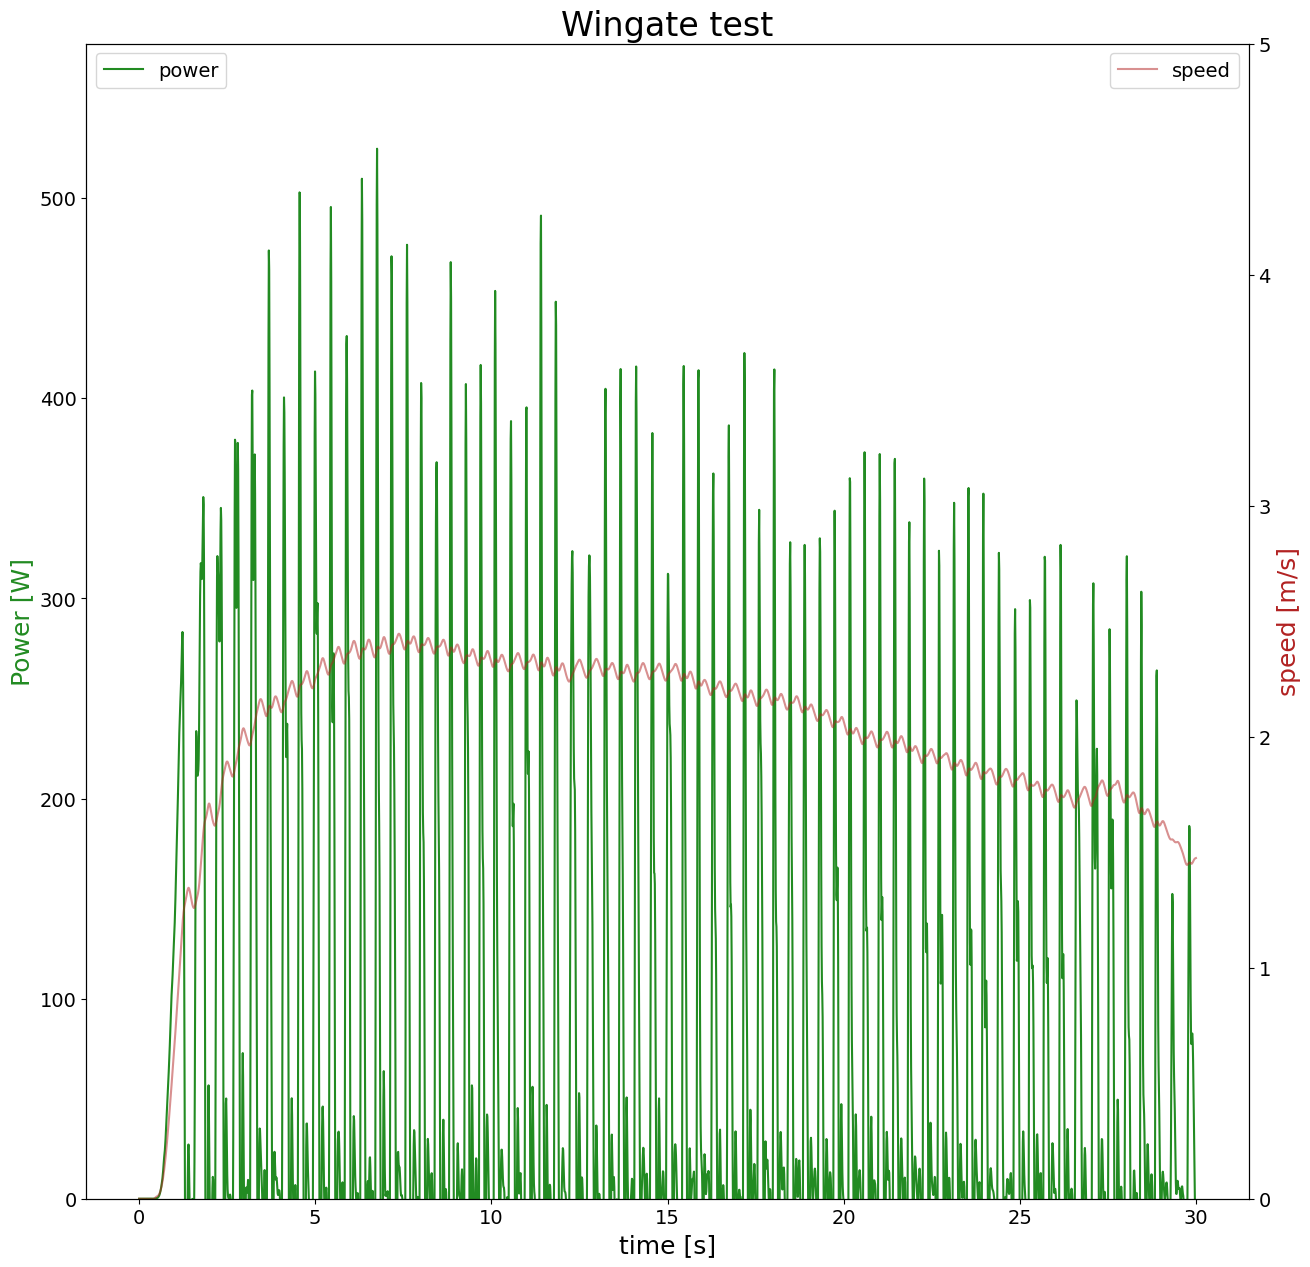

In [10]:
fig_wingate, outcomes = wl.ana.wingate(data)
print(outcomes)

Now we have the performance on the Wingate test! If you want to calculate the corresponding graded exercise test resistance for this participant you can do that with the following lines

In [11]:
muser = 65  # kg, mass user
v = 1.39  # m/s, comfortable velocity for maximal exercise test
p30 = outcomes['P30'][0]
wl.ana.protocol_max(p30, muser, wheelchair['weight'], v)

------------------------------------------------------------
 P30 = 67.44
 Predicted PO-peak = 52.335
 Sub-maximal 20%PO-peak = 0.0102 mu and velocity is 1.39 m/s
 Sub-maximal 40%PO-peak = 0.0205 mu and velocity is 1.39 m/s
-
 The start resistance for the maximal exercise test should be 0.0102 mu
 After 10 minutes the resistance should be 0.0512 mu
 The step length is thus 0.0045 mu
 Velocity is always 1.39 m/s
 Make sure to prolong the protocol for 25 minutes.
------------------------------------------------------------
